In [1]:
import warnings
import mglearn
import matplotlib.pyplot as plt
import numpy as np
import os

warnings.filterwarnings("ignore", category=FutureWarning)

In [2]:
X = np.array([[0, 1, 0, 1], [1, 0, 1, 1], [0, 0, 0, 1], [1, 0, 1, 0]])
y = np.array([0, 1, 0, 1])
counts = {}
for label in np.unique(y):
    counts[label] = X[y == label].sum(axis=0)
print("Частоты признаков:\n{}".format(counts))

Частоты признаков:
{0: array([0, 1, 0, 2]), 1: array([2, 0, 2, 1])}


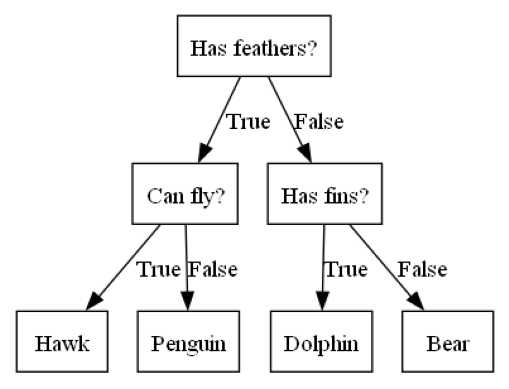

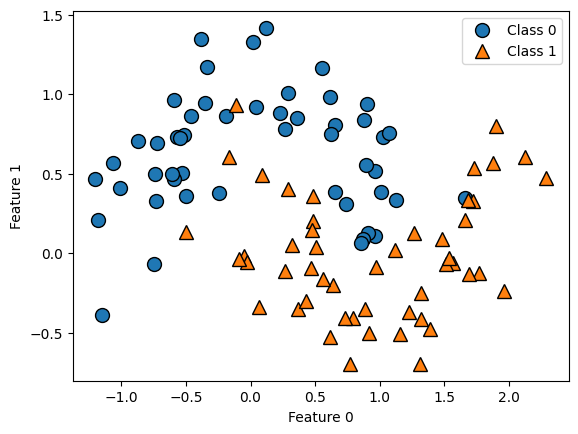

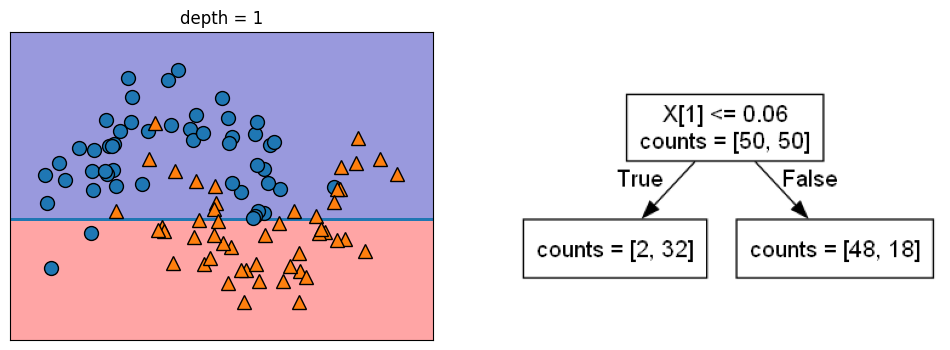

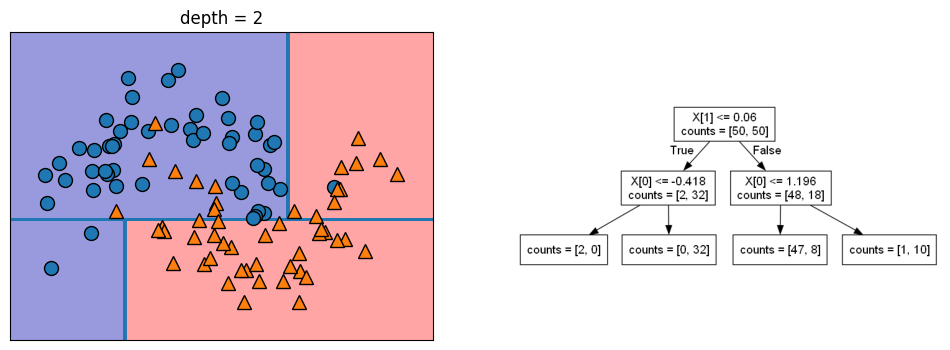

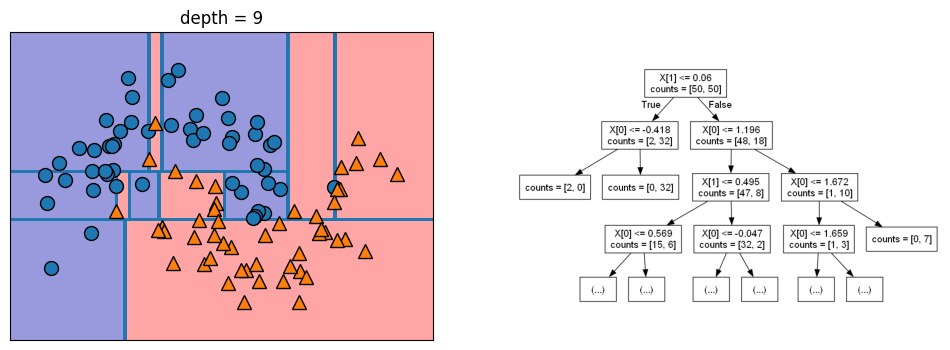

In [3]:
mglearn.plots.plot_animal_tree()
plt.show()
mglearn.plots.plot_tree_progressive()
plt.show()

In [4]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, stratify=cancer.target, random_state=42)
tree = DecisionTreeClassifier(random_state=0)
tree.fit(X_train, y_train)
print("Правильность на обучающем наборe: {:.3f}".format(tree.score(X_train, y_train)))
print("Правильность на тестовом наборe: {:.3f}".format(tree.score(X_test, y_test)))

Правильность на обучающем наборe: 1.000
Правильность на тестовом наборe: 0.937


In [5]:
tree = DecisionTreeClassifier(max_depth=4, random_state=0)
tree.fit(X_train, y_train)
print("\nПравильность на обучающем наборe: {:.3f}".format(tree.score(X_train, y_train)))
print("Правильность на тестовом наборe: {:.3f}".format(tree.score(X_test, y_test)))


Правильность на обучающем наборe: 0.988
Правильность на тестовом наборe: 0.951


In [6]:
from sklearn.tree import export_graphviz

export_graphviz(tree, out_file="tree.dot", class_names=["malignant", "benign"],
                feature_names=cancer.feature_names, impurity=False, filled=True)

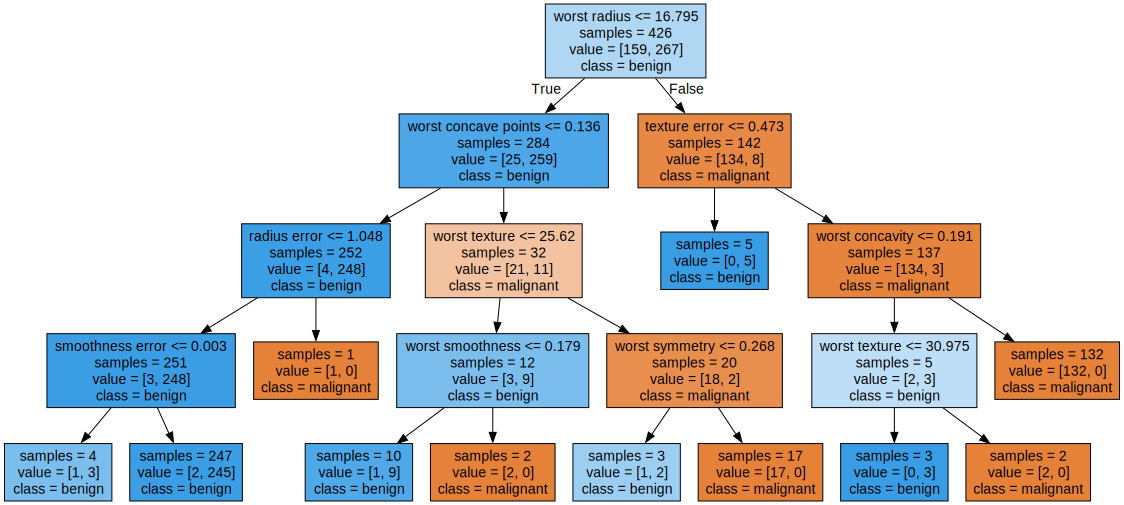

In [7]:
import graphviz
with open("tree.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

In [9]:
"Export as pdf"
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer
from sklearn import tree

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, stratify=cancer.target, random_state=42)
clf = tree.DecisionTreeClassifier(max_depth=4, random_state=0)
clf = clf.fit(X_train, y_train)
import pydotplus

dot_data = tree.export_graphviz(clf, out_file=None)
graph = pydotplus.graph_from_dot_data(dot_data)
graph.write_pdf("cancer.pdf")

True

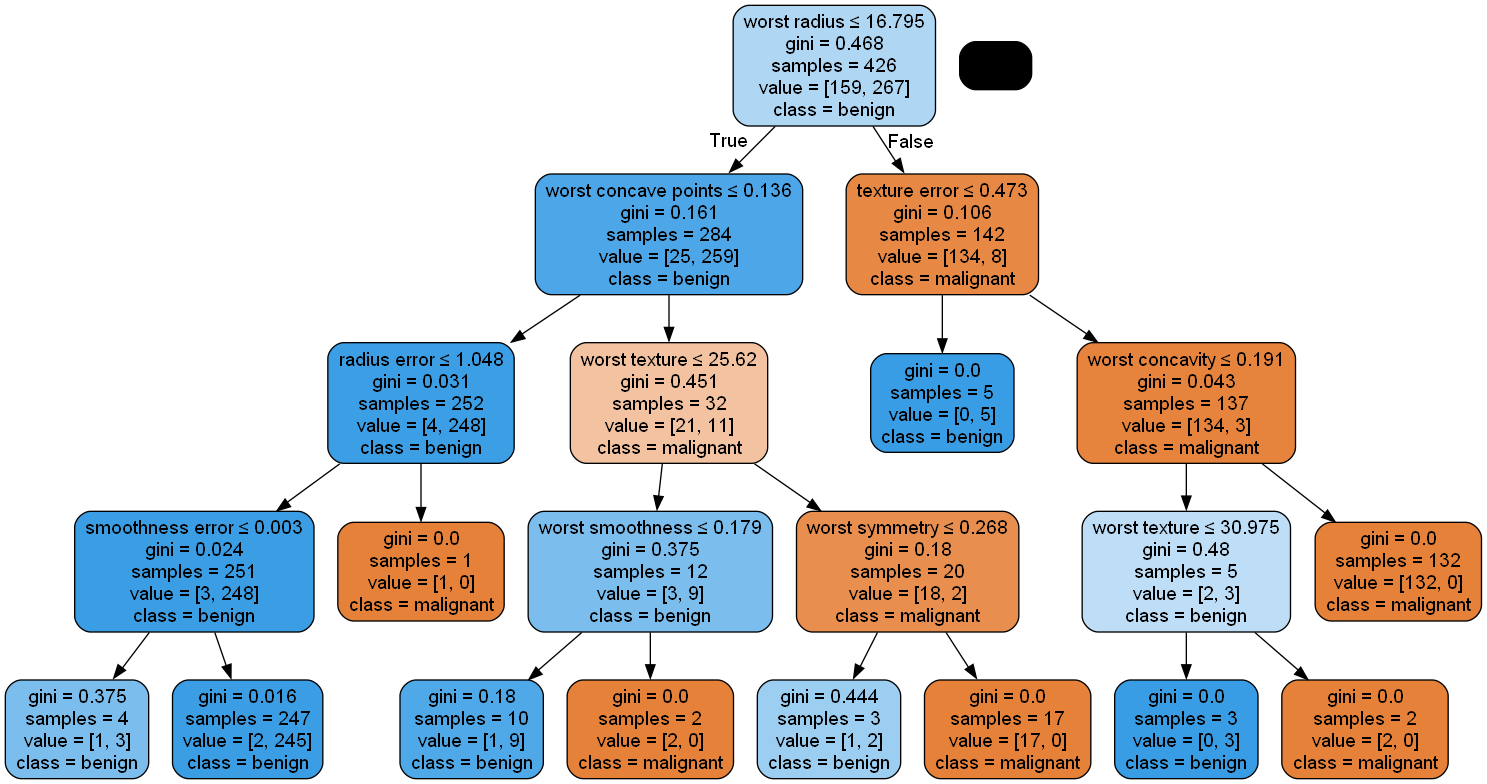

In [10]:
"Create tree with using IPython"
from IPython.display import Image

dot_data = tree.export_graphviz(clf, out_file=None,
                                feature_names=cancer.feature_names,
                                class_names=cancer.target_names,
                                filled=True, rounded=True,
                                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

In [11]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier().fit(X_train, y_train)
print("\nВажности признаков: \n{}".format(tree.feature_importances_))


Важности признаков: 
[0.         0.01204155 0.         0.         0.00752597 0.
 0.         0.0202365  0.         0.         0.00231135 0.04630969
 0.         0.00975731 0.00238745 0.00752597 0.         0.
 0.         0.         0.69546322 0.04179055 0.         0.00903116
 0.         0.         0.01740312 0.11684357 0.01137258 0.        ]


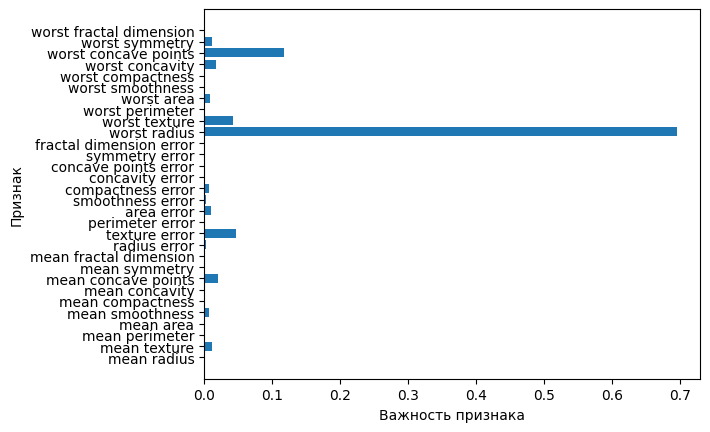

In [12]:
def plot_feature_cancer(model):
    n_features = cancer.data.shape[1]
    plt.barh(range(n_features), model.feature_importances_, align="center")
    plt.yticks(np.arange(n_features), cancer.feature_names)
    plt.xlabel("Bажность признака")
    plt.ylabel("Признак")
    plt.show()


plot_feature_cancer(tree)

Feature importances: [0. 1.]


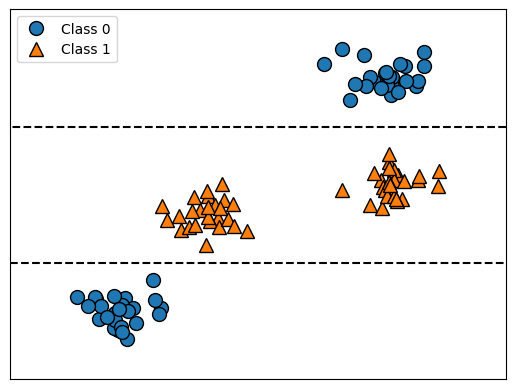

In [13]:
tree = mglearn.plots.plot_tree_not_monotone()
plt.show()

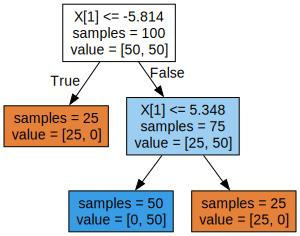

In [14]:
from IPython.display import display

display(tree)

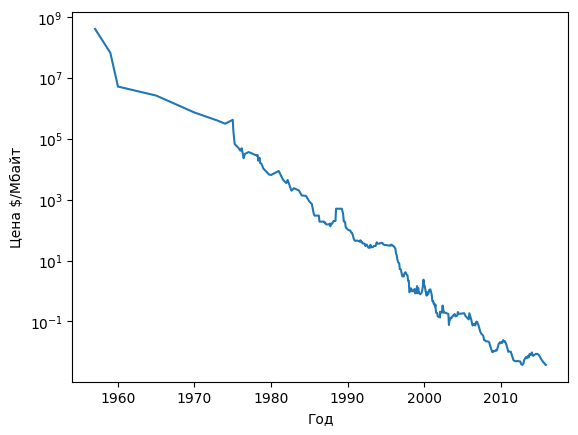

In [15]:
import pandas as pd

ram_prices = pd.read_csv("ram_price.csv")
plt.semilogy(ram_prices.date, ram_prices.price)
plt.xlabel("Год")
plt.ylabel("Цена $/Мбайт")
plt.show()

In [16]:
from sklearn.tree import DecisionTreeRegressor

data_train = ram_prices[ram_prices.date < 2000]
data_test = ram_prices[ram_prices.date >= 2000]
y_train = np.log(data_train.price)
X_train = data_train.date[:, np.newaxis]

print("X:\n{}".format(X_train))
print("y:\n{}".format(y_train))

tree = DecisionTreeRegressor().fit(X_train, y_train)

X:
[[1957.  ]
 [1959.  ]
 [1960.  ]
 [1965.  ]
 [1970.  ]
 [1973.  ]
 [1974.  ]
 [1975.  ]
 [1975.08]
 [1975.25]
 [1975.75]
 [1976.  ]
 [1976.17]
 [1976.42]
 [1976.58]
 [1977.08]
 [1978.17]
 [1978.25]
 [1978.33]
 [1978.5 ]
 [1978.58]
 [1978.75]
 [1979.  ]
 [1979.75]
 [1980.  ]
 [1981.  ]
 [1981.58]
 [1982.  ]
 [1982.17]
 [1982.67]
 [1983.  ]
 [1983.67]
 [1984.  ]
 [1984.58]
 [1985.  ]
 [1985.33]
 [1985.42]
 [1985.5 ]
 [1985.58]
 [1985.67]
 [1985.83]
 [1985.92]
 [1986.  ]
 [1986.08]
 [1986.17]
 [1986.25]
 [1986.33]
 [1986.42]
 [1986.5 ]
 [1986.58]
 [1986.67]
 [1986.75]
 [1986.92]
 [1987.  ]
 [1987.08]
 [1987.17]
 [1987.25]
 [1987.33]
 [1987.42]
 [1987.5 ]
 [1987.58]
 [1987.67]
 [1987.75]
 [1987.83]
 [1987.92]
 [1988.  ]
 [1988.08]
 [1988.17]
 [1988.33]
 [1988.42]
 [1988.5 ]
 [1988.58]
 [1988.67]
 [1988.75]
 [1988.83]
 [1988.92]
 [1989.  ]
 [1989.08]
 [1989.17]
 [1989.25]
 [1989.42]
 [1989.5 ]
 [1989.58]
 [1989.67]
 [1989.75]
 [1989.83]
 [1989.92]
 [1990.  ]
 [1990.17]
 [1990.33]
 [1990.

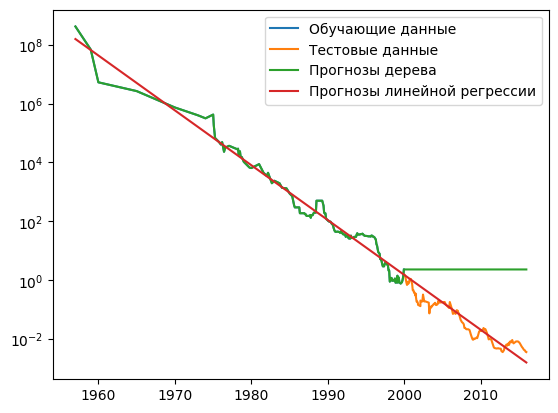

In [17]:
from sklearn.linear_model import LinearRegression

linear_reg = LinearRegression().fit(X_train, y_train)

X_all = ram_prices.date[:, np.newaxis]

pred_tree = tree.predict(X_all)
pred_lr = linear_reg.predict(X_all)

price_tree = np.exp(pred_tree)
price_Ir = np.exp(pred_lr)

plt.semilogy(data_train.date, data_train.price, label="Обучающие данные")
plt.semilogy(data_test.date, data_test.price, label="Тестовые данные")
plt.semilogy(ram_prices.date, price_tree, label="Прогнозы дерева")
plt.semilogy(ram_prices.date, price_Ir, label="Прогнозы линейной регрессии")
plt.legend()
plt.show()
